In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Task 1. 

Klout was a social media platform which allowed users to connect their social medias to it and in return it will calculate a klout score from 1-100, which measured a users popularity or clout through analysing their social media activity etc. We have a daaset which stores the distribution of Klout scores for 1048 users of the app and the following notebook looks particularily at the distribution of sample means for the Klout scores distribution. 

## Function to calculate the number of possible ways to choose a sample size of 250: 

In order to do this we can apply a formula from combinatorics which calculates the total number of possible ways to select $k$ items from a bucket of $n$ items where the order of the $k$ items is irrelevant. 

$n$ choose $k$ can be written as $ \binom{n}{k}$ and its formula is: 

$$  \binom{n}{k} = \frac{n!}{k!(n-k)!}$$ (Fowler, 1996)

where $!$ indicates the factorial operation 

This is because $n!$ is the number of possible ways to arange all of our $n$ items, $(n-k)!$ is the number of possible ways to arrange rest of the non k items whos permuatations we dont care about, so by dividing $n!$ by $(n-k)!$ we calculate the number of possible ways to select $k$ items from $n$ where order is important. However, if the order of our $k$ items is unimportant we can divide the number of possible ways to select $k$ from $n$ whch is $ \left( \frac{n!}{(n-k)!} \right) $ by the number of possible ways to order $k$ items which is $k!$

### Python Implementation 

In order to implement this function in Python we first need a function which can calculate factorials, below I have written a function to generate factorials using the recurisve formula which means that our factorial function will recurisvely call itself until we reach the base case which is where n is equal to 1. 

In [70]:
def fact(n): 
    if n ==1: 
        return 1 

    return n*fact(n-1) 

Plutting in our factorical function to create our combinatoric function. 

In [71]:
def nCk(n,k): 

    return fact(n) / ( fact(k) * fact(n-k) ) 

$k$ is equal to 250 as its the size of our desired samples, but to calculate $n4 we need to figure out how many users exist in our population of Klout scores. 

In [72]:
df = pd.read_csv('KloutScores.csv')
print(f'there is {len(df)} total users') 

there is 1048 total users


Plugging in $n$ =1048 and $k$ = 250 

In [73]:
nCk(n=1048, k=250) 

3.2830569965061e+248

Hence the total number of possible unique samples is  $ \approx 3.3\times{10^{248}} $, which is a massive number. 

## Generating random samples 

Below is a function to generate random samples from a list of data, using NumPys ```np.random.choice``` function which randomly selects k items from a list provided. 

In [74]:
def generate_random_samples(data : np.ndarray , num_samples : int, sample_size: int) -> np.ndarray: 
    samples = [np.random.choice(data, sample_size )  for i in range(num_samples) ]
    return np.array(samples ) 

The function above takes in 3 arguments, `data` which is the distribution you wish to sample from, `num_samples` which is the number of samples you wish to create and finally `sample_size` which is the size of each of your samples/ the number of datapoints in each sample. 

Below I will call the function on our distribution of Klout scores to extract a single sample with a size of 5. 

In [75]:
Klout_scores = df.scores.values 
generate_random_samples(Klout_scores, 1, 5 ) 

array([[23.38866821, 41.40739037, 32.89505269, 62.18433632, 49.70149333]])

## Plotting distribution of Klout scores

First we will begin by simply plotting the distribution of Klout scores using a bin size of 30. 

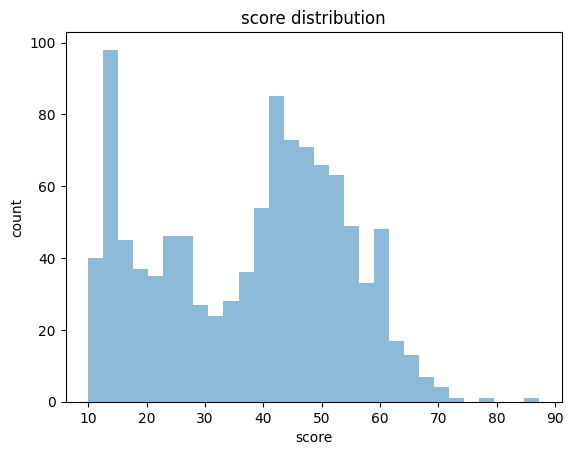

In [76]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins = 30 , alpha = 0.5 ); 

To plot the distribution of sample means, we will take 1000 samples and compute the mean of each. 

In [77]:
samples = generate_random_samples(df.values.flatten() , 1000, 250) 
samples

array([[28.20662453, 53.76523753, 21.661422  , ..., 28.72763665,
        51.24732988, 60.20085242],
       [11.58053927, 50.07522653, 13.36404076, ..., 13.01027911,
        43.25662366, 56.16753776],
       [48.36407184, 15.21163604, 35.3057097 , ..., 68.36407157,
        19.69877257, 53.44145707],
       ...,
       [41.08848679, 54.31748085, 51.47421848, ..., 27.9806438 ,
        50.1831237 , 58.26605087],
       [16.64702242, 10.        , 50.66546344, ..., 22.26578185,
        14.98512503, 41.30540463],
       [12.0251095 , 28.27028223, 13.19412275, ..., 42.49968712,
        15.94474229, 45.23071077]], shape=(1000, 250))

By inspect the shape of the `samples` array we can see that we have 1000 samples each with 250 values. 

In [78]:
samples.shape 

(1000, 250)

Calculating the mean of each sample to produce the distribution of sample means using `np.mean`. 

In [79]:
sample_mean_dist = np.mean(samples, axis = 1) 

## Plotting the distribution of Klout scores as well as the distribution of sample means 

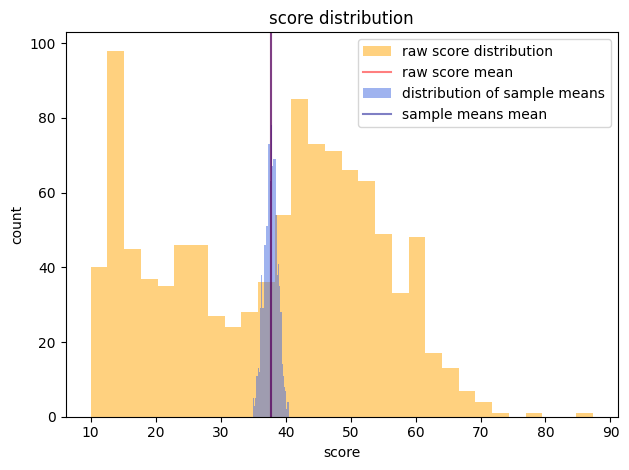

In [80]:
plt.title('score distribution') 
plt.xlabel('score') 
plt.ylabel('count') 
plt.hist(df.scores, bins= 30, alpha = 0.5, label = 'raw score distribution', color = 'orange'  )
plt.axvline(np.mean(df.scores), label = 'raw score mean', color = 'red', alpha = 0.5  ) 
plt.hist(sample_mean_dist, bins = 30 , alpha = 0.5, label = 'distribution of sample means', color = 'royalblue' )
plt.axvline(np.mean(np.mean(df.scores)) , label = 'sample means mean', color = 'darkblue', alpha = 0.5   ) 
plt.tight_layout() 
plt.legend() ; 

### Distribution of sample means 

There are three main things we can pick out about the distribution of sample means which is plotted in blue on the figure above. 

- The first is that the distribution of sample means seems to follow a normal distribution pattern with the majority of the sample means being centered around the mean of the sample means, Also the frequency of data points starts to tail off either side of the mean. This is due to the central limit theorem which stats the regardless of the original distribution the distribution of sample means will approach a normal distribution as the sample size becomes sufficient (Yan and Cain, 2020)

- The second is that the standard deviation of the distribution of sample means is far smaller when compared to the distribution of raw scores. 

- Thirdly, the mean of the raw scores as well as the mean of the sample means are the same/very similar,  which is represnted by the overlapping of the red line (raw score mean) and blue line (mean of sample means) to creating a purple line which lies in the centre of both distributions. 

### Proving results about the distributions of sample means 

Below I will display the mathematical proofs about the properties of sampling means distribution which explain our findings about the distribution of sample means of Klouts above. 

First let $X$ be our distribution of Klout socres which we will assume can be modelled by a Normal Distribution $X \sim \mathcal{N}(\mu,\,\sigma^{2})$.

Currently we know  $(\mu, \sigma) $ for our distribution of Klout scores but we want to estimate the $(\mu, \sigma)$ for our distribution of sample means. 

We can define the distribution of sample means  $\bar{X}$ where $n$ is equal to the sample size as: 

$$ \bar{X} = \left( \frac{x_1 + x_2 + ... + x_n}{n}  \right) $$

Where $x_1, x_2, x_3, ... , x_i$ are all independent random variables sampled from $X$. 

Calculating the expected value/ mean for distribution $\bar{X}$, using [expectation algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables): 

$$ E(\bar{X}) = E\left( \frac{x_1 + x_2 + ... + x_) }{n}  \right )$$ 

Given that $E(X+Y) = E(X) + E(Y)$ where $X,Y$ are two random variables: 

$$ E(\bar{X}) = \left( \frac{ E(x_1) + E(x_2) + ... + E(x_n) }{n}  \right )$$ 

As $x_k$ is sampled from $X$, The expected value of $x_k$ is equal to the mean value of $X$ which is $\mu$. Hence, $E(x_k) = \mu $ which we can sub into the formula above: 

$$ E(\bar{X}) = \frac{1}{n}( \underbrace{ \mu + \mu + ... + \mu }_{n\text{-times}}  )$$ 

Rewriting our summation as a multiplication: 

$$ E(\bar{X}) = \frac{1}{n}( n\mu )$$ 

Simplifying: 

$$ E(\bar{X}) = \mu $$

As $\mu$ is the mean value for distribution of Klout scores which we defined above, This explains the behaviour seen in the graphs of the distributions above where mean/expected value in our distribution of sample means was equal to the mean value in our distribution of Klout scores. (Piech and Sahami, 2017)

### proving the result for the standard deviation 

To calculate the standard deviation of $\bar{X}$ (distribution of sample means) we will apply the two following [Variance Algebra](https://en.wikipedia.org/wiki/Algebra_of_random_variables) rules: 

$$ VAR \left(x_1 + x_2 + ... + x_n \right) = VAR(x_1) + VAR(x_2) + ... + VAR(x_n)  $$
$$ $$ 
$$ VAR \left(aX  \right)  = a^{2}VAR(X) $$ 
$$ $$ 

Calculating the expected variance of our distribution of sample means $VAR(\bar{X} ) $ 

$$ VAR(\bar{X} )  = VAR \left(\frac{x_1 + x_2 + ... + x_n }{n } \right ) $$

Where $x_1, x_2, x_3, ... , x_i$ are all independent random variables sampled from $X$. 


Applying both of the variance algebra rules above gives us the following: 

$$ VAR(\bar{X} )  = \frac{ VAR(x_1 )+ VAR(x_2) + ... + VAR(x_n) }{n^{2}}  $$ 

The expected variance for an individual sample $x_k$ can be defined by the variance of our Klout score distribution $X$ which is $\sigma^{2}$. Hence $VAR(x_k) = \sigma^{2} $, subbing this into the equation above: 

$$ VAR(\bar{X} )  =  \frac{1}{n^{2}} \left (\underbrace{ \sigma^{2} + \sigma^{2} + ... +  \sigma^{2} }_{n\text{-times}} \right )  $$ 

Converting our summation into a multiplication: 

$$ VAR(\bar{X} )  =  \frac{1}{n^2} \left ( n \sigma^{2}  \right )  $$ 

Simplifying: 

$$ VAR(\bar{X} ) =  \frac{\sigma^{2} }{n} $$ 

To calculate the expected standard deviation we simply have to square root our expected variance: 

$$ \sigma(\bar{X}) = \frac{\sigma}{\sqrt{n} } $$ 

Once, again we can that this results lines up with our findings above given that the standard of our distribution of sampling means was significantly smaller than the standard deviation of the distribution of Klout scores. (Piech and Sahami, 2017)

Calculating the mean and standard deviation of the normal distribution describing the distribution of sample means using the formulas dervived above. 

In [81]:
original_mean = np.mean(df.scores.values) 
original_std = np.std(df.scores.values) 
sample_std = ( original_std / np.sqrt(250)  ) 

In [82]:
print(f'mean of sample means distribution: {round(original_mean, 2) }, std of sample means distribution: {round(sample_std, 4) } ') 

mean of sample means distribution: 37.72, std of sample means distribution: 1.0142 


###  Comparing the expected values with our observed values. 

In [83]:
sample_mean_observed = np.mean(sample_mean_dist) 
sample_std_observed = np.std(sample_mean_dist) 

print(f'mean of sample means distribution: {round(sample_mean_observed, 2) }, std of sample means distribution: {round(sample_std_observed, 4) } ')

mean of sample means distribution: 37.73, std of sample means distribution: 1.0126 


Comparing our observed mean and standard deviation to mathematical formula, we can see that both the mean and standard deviation are extremely close to one another with a rough diffeence of ~0.07 for the means and ~0.035 for the standard deviations. The gap between our observed mean of sampling distribution and the mean of the population (expected mean) will shrink we increase the size of ours samples this is known as the law of large numbers. 



Also, the gap between our observed and expected standard deviation will also shrink as we increase the sample size given that a greater sample size leads to a decrease in standard error. 

Though both the standard deviation and mean are primarily depedent on the sample size, increasing the number of samples can help to improve the accuracy of approximations and smooth out the sampling distribution. 

(need to add the central limit theorem comment here ) 

We can illustrate this idea with plotting our our sample of 1000, with varying sample sizes 

## BieberTweetter 

For the sample of BieberTweetters we can say that $n=250$ and $\mu = 40 $

A sample mean of 40 would fall to the right of the distribution of sample means. Below is both the emprical and normal approximation distributions with the sample mean of 40 plotted. 

In [84]:
# importing normal probability density function from scipy 
from scipy.stats import norm 

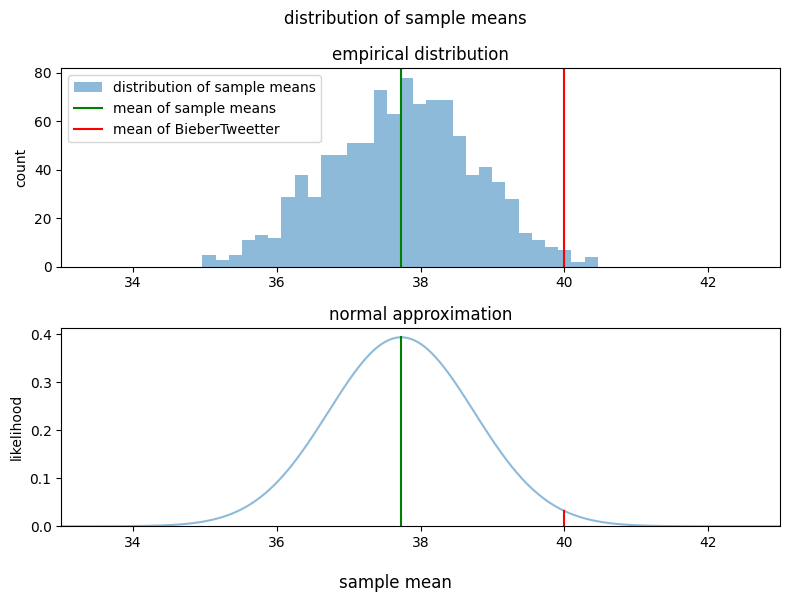

In [85]:
fig, ax = plt.subplots(2, figsize = (8,6  ) )

xmin,xmax = 33, 43 

#plotting the distribution of observed values 

ax[0].hist(sample_mean_dist, bins = 30 , alpha = 0.5 , label = 'distribution of sample means')
ax[0].axvline(np.mean(sample_mean_dist), label = 'mean of sample means', c = 'green'  ) 
ax[0].axvline(40, label =  'mean of BieberTweetter', c = 'red' ) 
ax[0].set_xlim(xmin, xmax ) 
ax[0].set_ylabel('count') 
ax[0].set_title('empirical distribution') 

#plotting the empirical distribution 

x_values = np.linspace(xmin, xmax , 1000)
#initialing a normal distribution 
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

ax[1].plot( x_values, mean_dist.pdf(x_values), alpha = 0.5   ) 

ax[1].plot( ( np.mean(sample_mean_dist), np.mean(sample_mean_dist) ) ,  ( mean_dist.pdf(37.7)  , 0 )  , c= 'green' ) 
ax[1].plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'red')
ax[1].set_xlim(xmin, xmax) 
ymin, ymax = ax[1].get_ylim() 
ax[1].set_ylim(0, ymax) 
ax[1].set_ylabel('likelihood') 
ax[1].set_title('normal approximation')

#plotting general titles 
midpoint = (fig.subplotpars.right + fig.subplotpars.left ) / 2 
fig.supxlabel('sample mean')
fig.suptitle('distribution of sample means', x = midpoint ) 
fig.tight_layout() 
ax[0].legend(); 

We can see that for both the empirical and normal approximation curve that the a sample mean of 40 compared to other samples of size 250, falls to the right of the distribution. Hence, it seems quite rare to acheive a sample with a mean of 40. 

### Likelihood that the mean of a sample is above 40 

Calculating the likelihood that a randomly selected sample of 250 users has a mean of at least 40. This likelihood / probability is represented by the total area underneath the probability density function curve where sample means >= 40. 

Below is a plot of the normal approxmation of the distribution of sample means, where the area of the green section represents the probability of a sample having a mean greater than 40. Though its worth noting that this green area extends to infinity as the likelihood tends to zero but for the sake of plotting I have only shown it up to a sample mean of 43 

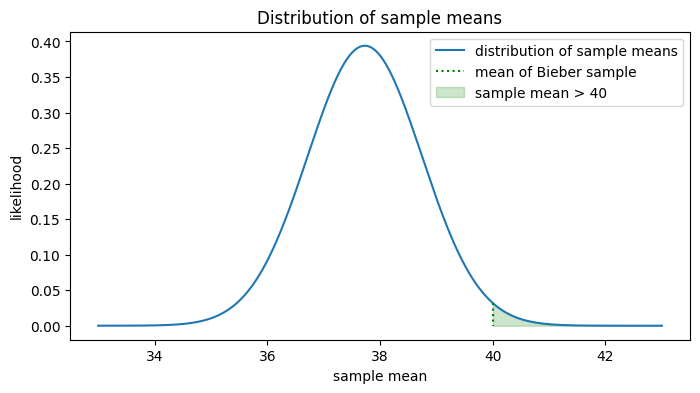

In [86]:
from scipy.stats import norm 
x_values = np.linspace(33, 43 , 1000)
mean_dist = norm(np.mean(sample_mean_dist) , np.std(sample_mean_dist)  ) 

plt.figure(figsize = (8,4)  ) 
plt.plot( x_values, mean_dist.pdf(x_values), label = 'distribution of sample means'  ) 

plt.plot( (40, 40) , ( mean_dist.pdf(40)   , 0 )  , c= 'green', linestyle = ':' , label = 'mean of Bieber sample ')

plt.fill_between( x=  x_values, 
                y1 = mean_dist.pdf(x_values) , 
                where= (x_values >= 40 ) , 
                color= "green",
                alpha= 0.2 , label = 'sample mean > 40 '  ) 

plt.legend()

plt.xlabel('sample mean') 
plt.ylabel('likelihood') 
plt.title('Distribution of sample means' );  

Calculating the green area which represents our desired probability, involves integrating our probability distribution function between the limits of  $40$ and $+\infty$

$$ \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $\mu$ is the mean $\sigma$ is the standard deviation of the distribution of sample means. 

To compute this we can use a SciPys cummulative desnisty function `cdf`, which calculates the following integral for a given normal distribution paramterised by $\mu$ and $\sigma$. 

$$ \int_{-\infty}^{b} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  $$ 

Where $b$, the upper limit, is the input into the `cdf` function. 

Given that total area under a Normal Distributions Probability Density Function(PDF) is alwayas equal to one: 

$$  \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   + \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx  = 1 $$ 

SciPys `cdf` can be used to compute the first term which we can then substract from 1, to calculate the area of the green section which represents the probability of a sample having a mean which is at least 40. 

$$   \int_{40}^{\infty} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx   =1  - \int_{-\infty}^{40} \mathcal{N}(\mu, \sigma^2 )(x) \,\,\ dx $$ 

In [87]:
aoc = (1 - mean_dist.cdf(40) ) 
print(f'the probability that our sample mean is greater or equal to 40 is { round(aoc * 100,2 ) }% ') 

the probability that our sample mean is greater or equal to 40 is 1.25% 


If the distribution of Klout scores for BieberTweetter users is identical to the distribution of Klout scores for all users, This would mean that the achieved sample mean of 40 is extremely very unlikely as the probability of achieving a sample mean of 40 or greater is only ~1.27%.

## Constructing a confidence interval 

We want to create a confidence interval at the 95% level for the mean Klout score if everyone  used BieberTwetter, which in other words means we want to find the range of values such that the probability that the mean Klout score if everyone used BieberTweetter would exist within that range is 95%. 

Creating this confidence interval, involves estimating the distribution of sample means if all where to begin to use BieberTweetter. Given that the distribution of sample means will also follow a normal distribution this is helpful in calculating where 95% of our data shall fall ( creating our confidence interval)  as in a Normal Distribution 95% of the data points fall within 1.96 standard deviations of the mean.

$$ \int_{-1.96}^{1.96} \mathcal{N}(0, 1  )(x) \,\,\ dx  = 0.95  $$

Using the fact above we can define the interval where 95% of sample means should should fall as: 

$$ \left(  \mu_{bt} - 1.96(\sigma_{bt}) , \mu_{bt} + 1.96(\sigma_{bt})  \right)$$

Where $\sigma_{bt}$ is the standard deviation of sample means if all users where to use BieberTweetter and $\mu_{bt}$ is the mean Klout score if all users were to use BieberTweetter. 

1.96 is known as our $\text{critical value}$  and $\sigma_{bt}$ is known as our $\text{standard error}$ . The two multiplied together create the $\text{margin for error}$ as the $\text{critical value}$ is defined for the standard normal distribution and hence must be scaled by the standard deviation of our non standard normal distribution. 

We do not know the mean Klout score if everyone were to use BieberTweetter $\mu_{bt}$ but if everyone where to begin to use BieberTweetter we can assume that all Klout scores are likely to be scaled by some constant k which will have no impact on the standard deviation of sample means as the spread of the data remains the same. Hence we can write: 

$$\sigma_{bt} = \sigma_{sm} $$ 

where $\sigma_{sm}$ is the the standard deviation of sample means of Klout scores, which we have computed previously. 

Our final step is to assume that our sample of BieberTweetter users with a mean of 40 exists within the interval (it is part of the 95% of sample means which lie inside of the interval). We can write this assumption as: 

$$  \mu_{bt} - 1.96\times{\sigma_{bt}} < 40 < \mu_{bt} + 1.96\times{\sigma_{bt}} $$

In order calculate the confidence interval for $\mu_{bt}$ we can rearrange the inequality above,  first we can substract $\mu_{bt}$ from all three terms: 

$$   - 1.96(\sigma_{bt}) < 40 - \mu_{bt} <  1.96(\sigma_{bt})  $$

Next substract 40 from all three terms: 

$$  -40 - 1.96(\sigma_{bt}) < - \mu_{bt} <  -40 + 1.96(\sigma_{bt})  $$

Finally we can multiply the inequality by -1 which will flip each of the signs around: 

$$  40 + 1.96(\sigma_{bt}) > \mu_{bt} > 40 - 1.96(\sigma_{bt})  $$

Using the above inequality we can formally define the equation for our cofidence interval as: 

$$ \left(\mu_s - \text{critical value}\times{\text{standard error}}, \mu_s +  \text{critical value}\times{\text{standard error}} \right) $$

Where $\mu_s$ is 40  and $\text{standard error}$ is our sample standard deviation and $\text{critical value}$ is 1.96. 

We have our cofidence interval at a 95% level for the the mean Klout score if all users where to begin to use BieberTweetter, which is expressed in terms of the standard deviation of sample means if all users where to use BieberTweetter. 

Subbing in our value for $\mu_{bt}$ to calculate our cofidence interval 

In [88]:
lower_bound =  round(40 - float(1.96* sample_std) , 2 ) 
upper_bound = round( 40 + float(1.96* sample_std) , 2 ) 

print(f'95% confidence interval {(lower_bound, upper_bound )}')

95% confidence interval (38.01, 41.99)


This interval describes the range of values which are 95% confident that the mean Klout score if all users where to begin to use BieberTweetter would lie in. Its worth noting that the mean Klout score is currently 37.7 which lies outside of this confidence interval Hence it is unlikely that our sample of 250 BieberTweetter users with a mean of 40 was collected by random chance, suggesting that the mean Klout score if all users where to use BieberTweetter would be higher than the current Klout score, which is to be expected as if all users began to use BieberTweetter it would lead to more points and in turn higher Klout scores. 

This result reinforces our previous findings where we calculated the probability of achieving a sample mean of 40 or more given the current distribution which was only 1.27%. 

# Task 2. 

New York traffic collision & weather dataset. The dataset shown below describes the weather conditions and the total number of collisions on a given day. An insurance company is hoping to use this data to draw a link between the total number of collisions and the weather conditions for a particular day in order to help them make smarter pricing decisions. E.g. if it were the case that days with rain lead to a larger number of total collisions then our insurance company may want to increase the price of their premiums for predicted rainy  day, so that they can more accurately price the risk they are taking on by ensuring drivers on a given day with particular weather conditions. 

# Data Loading and Cleaning 

In [687]:
df = pd.read_csv('New_York_collisions_and_weather_data.csv')
df.head() 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,01/01/2013,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,999.9,0,381
1,3,2013,1,2,02/01/2013,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,999.9,0,480
2,4,2013,1,3,03/01/2013,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,999.9,0,549
3,5,2013,1,4,04/01/2013,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,999.9,0,505
4,6,2013,1,5,05/01/2013,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,999.9,0,389


In the data above each record represents an individual day, a breakdown of all individual features is shown below. 

`day` - day of week for the particular record 

`year` - year for the particular record 

`mo` - month for the particular record 

`da` - day of month for the particular record 

`collision_date` - date of the particular record 

`temperature` - mean temperature for the day in Fahrenheight, missing = 9999.9

`dewp ` - Dew Point, the temperature which the current temperature would have to drop to in order to each 100% humidity, higher typically means more humid , missing = 9999.9

`slp` - Mean sea level pressure for the day in millibars to tenths , missing= 9999.9

`visib` - Mean visibility for the day in miles to tenths, missing = 999.9

`wdsp` - Mean windspeed for the day in knots to tenths, missing = 999.9

`gust` - Maximum sustained windspeed reported for the day in knots to tenths, missing = 999.9

`max` - Maximum Temperature reported during the day in Fahrenheight to tenths , missing = 9999.9

`min` - Minimum Temperature reported during the day in Fahrenheight to tenths, missing = 9999.9 

`prcp` - Total Precipation reported during the day in inches and hundredths, missing = 99.99 

`sndp` - Snow Depth in intches to tenth, missing = 999.9 if there is no snow it is usually not reported leading to a missing value 

`fog` - indicates if there was fog during the day 1 if yes, 0 if no or not reported. 

## Data cleaning 

In our dataset missing values are replaced with numerous placeholders depending on the feature ( 99.99/999.9 / 9999.9), these missing values can either be cleaned from our table e.g. removing all rows which contain missing values or instead we could impute values in place of the missing values using either statistical methods or the hints provided around why values are typically missing. 

Given that there are multiple values which could indicate a missing value for continous features, the code below will display a table which shows the proportion of values in each column which are the missing value indicator shown in the index. 

In [688]:
for idx, missing_value_indicator in enumerate([99.99, 999.9 , 9999.9 ]):
    
    if idx == 0: 
        missing_value_prop = (df == missing_value_indicator).mean() 
    else:
        missing_value_prop = pd.concat( (missing_value_prop,  (df == missing_value_indicator).mean() ) , axis = 1)

In [689]:
missing_value_prop.columns = [99.99, 999.9, 9999.9 ]
missing_value_prop.T.round(2) 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
99.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0
999.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.01,0.05,0.05,0.37,0.0,0.0,0.0,0.92,0.0,0.0
9999.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0


### Deciding on the best stratgegies for each of the columns with missing values 

- `sndp` which is the snow depth has 92% missing values. However, it's common that stations do not report zeros for days with no snow and only report the actual snow depth on days with snow, so all missing values will be replaced with 0s to represent no snow. 

- `gust` also has a fairly high proportion of missing values 0.37, though there is no information provided around why these values may be missing, so mean inputation will be used. 

- `wdsp`, `slp`, `visib` , `mxpsd` - All have fairly low levels of missing values when compared to the previous to features but similar to  `gust` there is no added info provided around why the values are missing, hence we will use mean imputation


### replacing missing values 

Zero inputation for `sndp` 

In [690]:
df['sndp'] = df['sndp'].replace(999.9 , 0 ) 

Mean Imputation for `gust`, `wdsp`, `slp`, `visib`, `mxpsd`. 

In [691]:
# dictionary defining each feature and the value which is used to represent missing values

feature_missing_indicator = {'gust' : 999.9 , 'wdsp' : 999.9 , 'slp' : 9999.9 , 'visib' : 999.9 , 'mxpsd'  :999.9 } 
for feature, indicator in feature_missing_indicator.items(): 
    df[feature] = df[feature].replace(indicator, df[feature][df[feature] != indicator].mean() ) 

### converting dates to pandas datetime dtype 

Currently the collision date is stored in our dataframe as a string, we can convert this to a pandas datetime object which will make any future calculations regarding the collision date easier. 

In [692]:
df.collision_date = pd.to_datetime(df.collision_date, dayfirst = True ) 

### printing cleaned table 

In [693]:
df.head() 

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
0,2,2013,1,1,2013-01-01,37.8,23.6,1011.9,10.0,6.1,8.9,19.0,39.9,33.1,0.0,0.0,0,381
1,3,2013,1,2,2013-01-02,27.1,10.5,1016.8,10.0,5.3,9.9,19.0,33.1,21.9,0.0,0.0,0,480
2,4,2013,1,3,2013-01-03,28.4,14.1,1020.6,10.0,3.7,8.0,15.0,32.0,24.1,0.0,0.0,0,549
3,5,2013,1,4,2013-01-04,33.4,18.6,1017.0,10.0,6.5,13.0,24.1,37.0,30.0,0.0,0.0,0,505
4,6,2013,1,5,2013-01-05,36.1,18.7,1020.6,10.0,6.6,12.0,21.0,42.1,32.0,0.0,0.0,0,389


## Bivariate Analysis of the features 

Given that the insurance company is interested in linking our time/weather features to the number of collisions on a given day, we will first measure the correlation between each of our features and the number of collisions on a given day.

The results of this Bivariate analysis/correlation study should inform us around which features e.g. days of week or particular weather conditions that the insurance company should pay particular attention to when pricing their insurance for a given day. 


Its important to note that our dataset currently contains both continous and discrete features, different techniques must be applied to calculate the correlation between our continous features and the number of collisions when compared to our discrete features. For our continous features we can simply calculate a Pearson Correlation Coefficeint (r score) and for our discrete features will create scatter plots betweeh each feature and the no. collisions which can be used to interpret correlations. 

In [749]:
continous_features = ['temp','dewp','slp', 'visib', 'wdsp','mxpsd','gust','max','min','prcp', 'sndp' , 'day'  , 'NUM_COLLISIONS']
dateime_features = ['collision_date'] 
categorical_features = ['day', 'year', 'mo' , 'fog' ] 

`day` appears in both of the lists for continous as well as categorical features. Given that each day of the week is represented using an integer this means we are able to treat it is a both a continous and a categorical feature in our bivariate analysis. 

## Measuring Pairiwse Correlation between continous features 

Below is a heatmap which displays the pearsons correlation coefficient between each pair of continous features in our dataset. A Pearsons correlation ranges between -1 and 1, with 1/-1 indiciating perfect positive/negative correlation that two features are parallel to eachother and 0 indicating that there is zero correlation and the two features are perpendicular to each other.

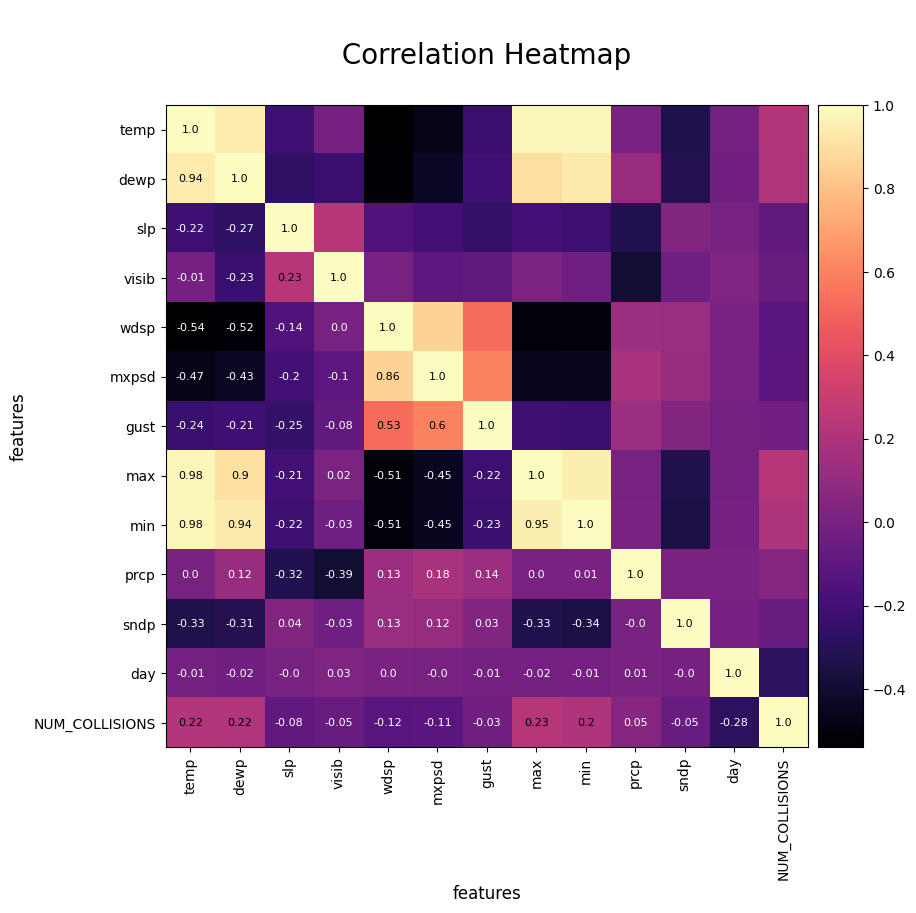

In [750]:
import matplotlib as mpl 
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,ax = plt.subplots( 1,   figsize = (9,9)  )

correlation_matrix = df[continous_features].corr().values


heatmap = ax.imshow( correlation_matrix , cmap = 'magma') 

for i in range(len(continous_features) ): 
    for j in range(i, len(continous_features)  ): 
        if correlation_matrix[i,j] > 0.2: 
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 8, ha = 'center' , va = 'center'  ) 
        else:
            ax.text(i,j, round(correlation_matrix[i,j], 2) , size = 8, ha = 'center' , va = 'center' , c = 'white' ) 
      # plt.text(j,i , round(correlation_matrix[i,j], 2) , size = 6, ha = 'center' , va = 'center'  ) 

divider = make_axes_locatable(ax)
cax = divider.append_axes('right',  size='7%', pad=0.1 ) 

fig.colorbar(heatmap, cax = cax  ) 

ax.set_xticks(np.arange(len(continous_features) ) , continous_features , rotation = 90 ) 
ax.set_yticks(np.arange(len(continous_features)) , continous_features )

ax.set_title('\n Correlation Heatmap \n ' , size = 20 )  
ax.set_xlabel('features', size = 12  ) 
ax.set_ylabel('features', size = 12  ) ; 

Given that we are interested in using weather/time data in order to predict  ```NUM_COLLISIONS```, we will primarly be focusing on the bottom row of our heatmap which displays each of the pairwise correlations with `NUM_COLLISIONS`. Across the board we can see that the correlation between our features `NUM_COLLISIONS` seems quite weak with no feature achieving an r score above 0.3. 

### Positive feature correlations with `NUM_COLLISIONS` 

- ` temp ` : The mean Temperature achieves an r score of 0.22, which means that there is a weak positive correlation between mean Temperature for a given day and the number of collisions. This could be as the warmer the weather the more people are outside attending events etc leading to an increase in the number of pedestrians as well as drivers.
  
- `dewp`, `max` , `min` : are all  highly correlated with `temp` with r scores of 0.94, 0.98, 0.98 respectively, which explains why they each have similar r scores with `NUM_COLLISIONS` as `temp`. 
   
### Negative feature correlations with `NUM_COLLISIONS`  

- `day` : The day of week as a continous feature achieves the strongest correlation with `NUM_COLLISIONS` out of all features in our dataset, with a R score of -0.28 which is likely cause  fall in the number of commuters and in turn total road users on the Saturday/Sunday which are encoding with the largest integers 6 and 7 respectively

- `wdsp`,`gust` : have an r score of -0.12 and -0.11 between themselve and `NUM_COLLISIONS` respectively (as they are both highly correlated with one another), these small correlation scores may be a result of greater amounts of wind leading to a reduction in the control drivers have over their vehicles leading to a larger no. collisions. 

### Features with none/negible correlation 

I have defined all features with none / negible correlation as those with a r score in the range $(-0.1, 0.1)$ 

Many weather based features seem to have very little correlation with the total number of collisions. E.g. both `prcp` (rainfall) and `sndp` (snowfall) and `visib`  (vibility) which are commonly believed to increase the risk of collisions have r scores close to zero, with `sndp` having a small but negative r score implying that snow leads to a reduced number of collisions which is likely a result of less people driving whilst it snows. 

`slp` sea level temperature seems to have a small negative correlation with no. collisions. 

### No. Collisions Vs Rate of Collisions 

One possible reason why we see such low correlation between each of our weather based features and the total number of collisions, is that it may be the case that our weather based features e.g. `prcp` (rainfall) are correlated with the rate of collisions $\left(\frac{\text{no. collisions}}{\text{no. drivers}} \right)$ rather than the total number of collisions. E.g. A rainy day may lead to less people driving on the roads but a greater risk of a collision due to the rain could mean that there is the same number of collisions on a rainy day as a dry day. Hence, it may be worthwhile for the insurance company to aim to predict the rate of collisions on a given day rather than the total number of collsions as it more accurately represents the risk they are taking by ensuring drivers. 

A large facotr which influences e no. collisions may be simply be the number of drivers on the road as with more road users you are likely to expect more collisions. 

## Plotting the corelation between categorical features and the total number of collisions 

Below is a plot which displays the individual scatter plots between each of our categorical variables and the total number of collisions on a given day. 

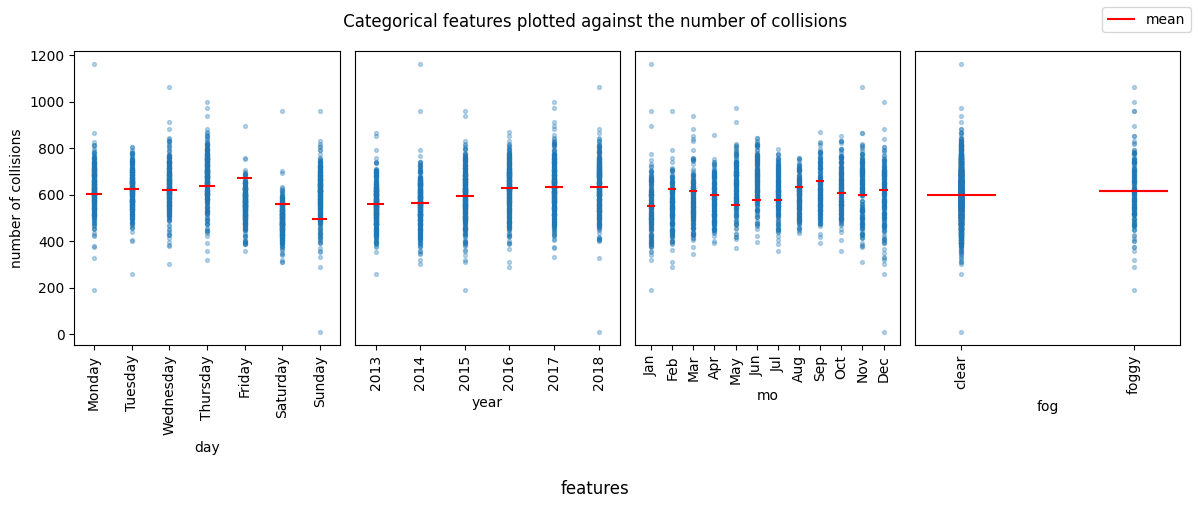

In [746]:
#converting al of our features to str, to ensure our xticks are formatted correctly 
for feature in categorical_features:
    df[feature] = df[feature].astype('string')

#setting the number of subplots equal to our number of features 

n_subplots = len(categorical_features)

fig, ax = plt.subplots( 1, n_subplots , figsize = (12, 5     ) ) 

fig.suptitle(' Categorical features plotted against the number of collisions ')

#dictionary defining the xticks are currently days of week and months of year are encoded using integers 
xticks_dict = {'day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              'mo': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
              'fog' : ['clear', 'foggy' ] }


y_idx = 0 
for idx, categorical_feature in enumerate(categorical_features): 

    #only want to set a y label for the first plot as it will be shared between the rest 
    if idx == 0:
        ax[idx].set_ylabel('number of collisions') 
    else:
        ax[idx].set_yticks([]) 


    ax[idx].set_xlabel(categorical_feature)
    
    ax[idx].scatter(df[categorical_feature], df.NUM_COLLISIONS, s= 8 , alpha = 0.3  ) 

    #if our feature has predefined xticks(day,month) assign them to our plot else use the existing onces
    if xticks_dict.get(categorical_feature):
        xticks = xticks_dict.get(categorical_feature)
    else: 
        xticks = ax[idx].get_xticklabels() 
        
    ax[idx].set_xticks(np.arange(len(xticks) ) , xticks, rotation = 90 ) 

    #calculating the mean number of collisions for each setting of our discrete variable and plotting it 
    means = df.groupby(categorical_feature)['NUM_COLLISIONS'].mean() 
    for i,mean in enumerate(means):
        ax[idx].hlines(mean, i - 0.2, i + 0.2,  color = 'red'   ) 
    
    if idx % 2 == 0: 
        y_idx = +1 
    
ax[idx].hlines(mean, i - 0.2, i + 0.2,  color = 'red'  , label = 'mean' ) 
fig.supxlabel('features')
fig.tight_layout() 
fig.legend(); 

The scatter plots have been plotted with an alpha of 0.5, meaning that darker blue areas imply greater frequency of points and the red  bars indicate the mean number of collisions for each setting of our discrete variable. 

-  `day` : The mean number of collisions rises gradually through the week until Friday where it shoots up and then falls back down again on Saturday and Sunnday. This is likely a result of less people driving on the weekends due to less commuting, with Friday likely being the higest as it is a mix of commuting as well as socail events etc. 

-  `year` : We can see that there was a gradual rise in the number of collisions each year and then starting to plateu in 2017.  

- `mo` : the mean number of collisions seems to fluctuate throught the months. Sepetember with the highest mean collisions, this could potentially be caused by people beginning to back to school/work. January has the lowest mean which could be a result of poor weather and a quieter period following winter festivities. 

- `fog` : We can observe little difference between foggy and clear, with foggy being marginally higher which is expected given that fog can lead to reduced visibility increasing the chance of a road accident. But as mentioned previously it is likely that some weather conditions are more correlated with the rate of collisions rather than the no. collisions. 

## Sine transform to day of week feature. 

When looking at the scatter graph of day of week plotted against the total number of crashes, we observe some level of "wave like"/ sinusoidal behaviour as the number of collisions rises until friday and then falls on both saturday and sunday. This pattern is vaguely similar to a sine wave between $(0, \pi)$.

Hence, to improve the correlation between day of week stored as a continous feature and the number of collisions, we can apply the following sine transformation: 

$$ \hat{x} = sin \left(\frac{x\times{\pi}}{n } \right)$$

where $x$ is the integer representing the day of the week, $n$ is 7 (the number of days in a week) and $\hat{x}$ is our transformed value. 

Below is a graph displaying the sine transformation of days of week described above, where the height of day of week represents its transformed value. 

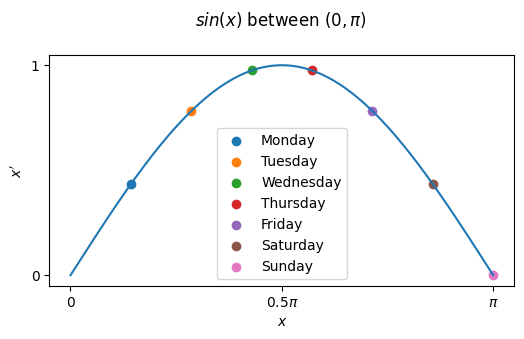

In [697]:
plt.figure(figsize = (6,3  ) ) 
xvals = np.linspace(0, np.pi, 10000 ) 
yvals = np.sin(xvals) 
plt.plot(xvals, yvals ) 
plt.xticks([0, np.pi /2 , np.pi  ] , ['0' , '$0.5\pi$',  '$\pi$'] ); 
plt.yticks([1, 0  ] )
plt.title('$sin(x)$ between $(0,\pi)$ \n'  )
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday' ] 
for idx, day in enumerate(days_of_week):
    xval = (idx + 1 ) * (np.pi / 7)
    yval = np.sin(xval) 
    plt.scatter( xval, yval  , label =  day )

plt.xlabel('$x$')
plt.ylabel("$x'$")
plt.legend(); 

The Sine transformation doesnt perfectly match relationship between day of week and no. collisions perfectly, the transform means Wednesday and Thursday are expected to have the highest no. collisions where our impirical data shows that Friday has the higher no. collisions.  However, it still captures the rough trend in the data and should hence lead to an improvement in the correlation between day of week and total number of collisions. 

Calculating the correlation coefficient between our sine transformed day of week feature and total number of collisions. 

In [698]:
df.day = df.day.astype('int') 
day_sine = df.day.apply( lambda x : np.sin(  np.pi  * ( x / 7 ) )  ) 
float(round(np.corrcoef(day_sine, df.NUM_COLLISIONS)[0][1], 2)) 

0.46

The Sine transform led to an increase in the correlation between our day of week feature and the total number of collisions from ~ -0.26 to ~ 0.46, the strength of the correlation increased but also the direction has reversed from a negative to a positive correlation. 

### One Hot encoding day of week feature

Despite transforming the day of week feature using a sine curve to better match the rise and fall of collisions during the week, it may be more sensible to encode the day of the week feature using one hot encodings, where we create a seperature feature for each individual day of week where 1 indiciates if a particular row corresponds to a given day of the week. This will be particular useful when it comes to the regression analysis as our model will be able to learn an individual weight for each day of week. 

# Regression Analysis 

Training a linear regression model to predict `NUM_COLLISIONS` using our weather and time beased features, Provided the model is accurate it can be used by insurance company to more accurately price the risk they are taking on through insuring drivers on a particular day. 

Our Linear Regression model will exploit the linear correlations between our features and the total number of collisions, which we explored in the bivariate data analysis. 

## Linear Regression Overview 

Linear Regression works by assuming our target variable can be expressed as a linear combination of our features. It aims to find $\mathbf{w}$ such that its dot product with our feature vector $\mathbf{x}$ produces a prediction $\mathbf{y'}$ which is close to our taget variable $\mathbf{y}$. 

$$ \mathbf{y'} = \mathbf{w}\cdot{\mathbf{x}} $$

In case of our collision dataset, our feature vector $\mathbf{x}$ stores weather and time data for a particular day and our target variable $\mathbf{y}$ is the observed number of preidctions on that day and finally $\mathbf{y'}$ is our predicted number of collisions given the time and weather conditions defined inside of our feature vector $\mathbf{x}$. 

To measure the accuracy of a particular setting of $\mathbf{w}$ which is responsible for our predictions, we can define our loss function which is the sum of the squared difference between our actual and predicted no. collisions across all of the samlpes in our training set. 

$$ \mathcal{L}(\mathbf{w}) = \sum_{i=1}^{n} ( \mathbf{y}_{i} - \mathbf{w}\cdot{\mathbf{x}_i})^{2} $$ 

Where $n$ is the number of training samples, $\mathbf{y}_i$ observed no. collisions for the current sample $w \cdot{\mathbf{x}_i} $  is our predicted number of collisions.

This is known as ordinary Least Squared(OLS) regression, given that we are amining to find $\mathbf{w}$ which minimises the sum of the squared differences, squared differences are used to ensure that positive and negative differences do not cancel eachother out during the summation process. 

The process of training a linear regression model / finding the optimal $\mathbf{w}$ doesnt require an interative optimization method like gradient descent rather the global minima of the loss function can be computed analyitically thanks to the convex loss function and the model's linear formulation. 

To setting the optimal setting of $\mathbf{w}$, we must fund $\mathbf{w}$ such that the derivative of our loss function with respect to $\mathbf{w}$ is equal to zero. 

$$ \frac{d \mathcal{L}(\mathbf{w})}{d \mathbf{w} } = 0 $$

(Zhu, 2011)

This equation above can be solved using multivariate calculus which will calculate the closed form solution. But in this notebook we will use scikit-learns `LinearRegression` which has an in-built OLS slolver. 

## Importing libraries 

In [699]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

## Feature Selection 

Given the context of aiming to predict the number of collisions in the future, the following features are worth dropping from our dataset: 

- `collision_date` : Training a linear regression model with `collision_date` as categorical feature, will result in a learnt weight for each individual day inside of the dataset. However, these weights cannot be used to predict the number of collisions for future dates. 

- `year` : `year` as a categorical feature will result in the model learning a weight which displays the average no. collisions over a year but wont be useful for predicting `NUM_COLLISIONS` for future years. 

- `da` : `day` represents day of the month will also be removed given that it is likely to be random noise.

- `NUM_COLLISIONS` : as if it were available then there would be no need to predict it / not available at inference time.


- `dewp`, `max` , `min` are all highly correlated with `temp`.

- `maxwdsp` and `gust` are highly correlated with `wdsp`

Highly correlated features can make it difficult for the model to determine which features are important, it can reduce the interability of the model and depending on the solver can impact model training as parallel features can it difficult to compute the inverse/psudeo inverse required in the closed form solution for OLS. 

In [700]:
# Dropping features mentioned above
X_df = df.drop( [ 'year', 'da',  'collision_date', 'NUM_COLLISIONS'] ,  axis = 'columns' )
# Selecting non correlated features 
X_df = X_df[[ 'day', 'mo', 'temp', 'wdsp', 'fog', 'prcp', 'sndp', 'slp' ] ] 

Calling `pd.get_dummies` to split out categorical features with more than 2 possible settings inside our dataframe . This will split out each of the individual settings of each categorical/discrete feature into their own feature.

For example, our day feature is seperated into 7 different features each of which store a True/False value indicating whether or not it is the current day. 

In [701]:
# Converting our day feature to string as get_dummies classifies categorical features as those with a string datatype. 
X_df.day = X_df.day.astype('str') 
X_df.fog = X_df.fog.astype('int') 

#creating our feature matrix X and target vector y
X_df = pd.get_dummies(X_df)

y = df['NUM_COLLISIONS']

Dropping `day_1` and `mo_7` from our dataset to avoid the dummy variable trap, as `day_1` can be represented by 0s in all other day dummy variables, Also including all dummy variables created by `get_dummies()`  will create depedent variables in our feature matrix as `day_1` can be represented as a linear combination of `day_2`, `day_3` ... `day_7` which makes our matrix singular meaning it has no inverse and as result we cannot commpute inverse which is required for the closed form solution. 
(Mohan, 2024)

However, scikit-learn using the psuedo inverse rather than the pure inverse so this step is not strictly required but it is general good practice. 

In [702]:
X_df.drop(['day_1', 'mo_7' ], axis = 'columns', inplace = True ) 

We are dropping `day_1` and `mo_7` in particular given that the mean no. collisions for each of these lies closest to the mean no. collisions over all. This is important given that now each of the each of remaining dummy variables will represent their deviation from the dropped variable so it makes sense to select a variable which represents the average behaviour so now each of the remaining dummy variables measure the deviation from the average behaviour, which will come in handy later for interpreting feature weights. 

In [703]:
X_df.columns 

Index(['temp', 'wdsp', 'fog', 'prcp', 'sndp', 'slp', 'day_2', 'day_3', 'day_4',
       'day_5', 'day_6', 'day_7', 'mo_1', 'mo_10', 'mo_11', 'mo_12', 'mo_2',
       'mo_3', 'mo_4', 'mo_5', 'mo_6', 'mo_8', 'mo_9'],
      dtype='object')

Examples of the hot encoded features include `mo_4` representing April and `day_5` representing Friday. 

## Preprocessing 

Given that OLS regression is scale invariant meaning there is no need preprocess/transform our features before training for optimal performance. However, later on if we wish to interpret the model weights it is handy to have our features on similar scales so model weights between continous and categorical features can be compared directly. 

In [704]:
from sklearn.preprocessing import StandardScaler

importing Sklearn MinMaxScaler which will scale all our continous features to a standard normal distribution with a mean of zero and a standard deviation of one. 

In [705]:
Scaler = StandardScaler() 
X_df[['temp', 'wdsp', 'fog','prcp', 'sndp', 'slp'] ]= Scaler.fit_transform(X_df[['temp', 'wdsp', 'fog','prcp', 'sndp', 'slp']] ) 

In [707]:
X = X_df.values

## Splitting out training and testing data 

Creating train test split using sklearns `train_test_split` function, with a `test_size` of 0.2 and `random_state` of 42. 

In [708]:
Xtrain,Xtest, ytrain,ytest = train_test_split(X,y , test_size = 0.2, random_state = 42 ) 

Initialising our Linear Regression model with the default parameters and fitting it to the training set. 

## Fitting our Model to the data 

In [709]:
lr = LinearRegression() 
lr.fit(Xtrain, ytrain) 

LinearRegression()

## Calculating the uncertainities of our regression line using standard errors 

Standard Errors measure the uncertainty in the estimated model coefficients, as our paramter values are esimated from our sample of data which in our case is our collisions dataset rather than the entire population. (Rodriguez, 2022)


The standard error of our model coefficients can be defiend as the following: 

$$ SE(x_i) = \sqrt{ \sigma^{2} \cdot (\mathbf{X}^T\mathbf{X})_{ii}^{-1}}$$

$$ SE(b) = \sqrt{ \frac{\sigma^{2}}{n} + \mathbf{\hat{x}}(\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{\hat{x}}}$$

where $x_i$ is a particular feature, $b$ is our bias term ,  $\sigma^{2} $ is the variance of our residuals and $\mathbf{X}$ is our feature matrix

In [729]:
var_res = np.sum((ytrain - lr.predict(Xtrain))**2) / (Xtrain.shape[0] - Xtrain.shape[1] ) 

Calculating the inverse of the gram matrix (Kolter, 2015) and extracting the diagonal

In [711]:
Xtrain = Xtrain.astype('float')
gram_matrix = Xtrain.T@Xtrain
diag_inv_gram_matrix = np.diag(np.linalg.inv(gram_matrix)) 

Multplying each diagonal by our variance to calculate the standard error for each of our features 

In [714]:
std_errors = np.sqrt(diag_inv_gram_matrix * var_res).round(2)

calculating the standard error of our bias term 

In [726]:
std_error_bias = np.sqrt(var_res * (Xtrain.mean(0).T)@(np.linalg.inv(gram_matrix))@(Xtrain.mean(0))) 

In [727]:
features = list(X_df.columns) + ['bias'] 
std_errors = np.concatenate((std_errors, [std_error_bias]) )
features_std_errors = dict(zip(features, std_errors )) 

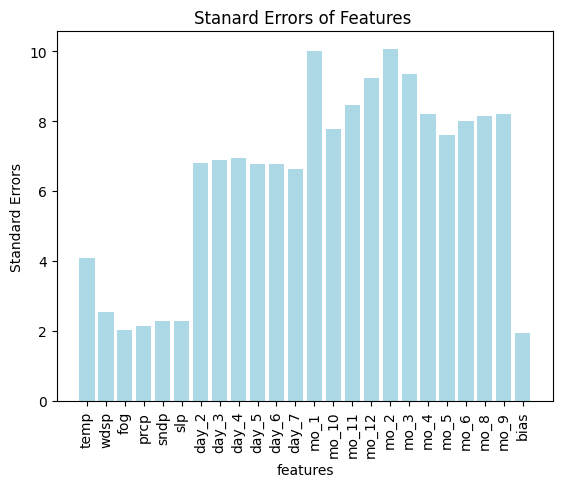

In [728]:
plt.bar(np.arange(len(features_std_errors )) , features_std_errors.values(), color = 'lightblue' ) 
plt.xticks(np.arange(len(features_std_errors)), features_std_errors.keys(), rotation = 90 )
plt.xlabel('features') 
plt.ylabel('Standard Errors') 
plt.title('Stanard Errors of Features '); 

It is expected that our continous features such as `temp` , `wdsp` have the lowest standard errors given that they are the least sparse features compared to our categorical features like `fog`, `day` and `mo` . `prcp`  is also fairly sparse given that it doesnt rain everyday. 

In practice standard errors tell precise our estimated coefficients are e.g. we can be more confident that the estimated coefficient for `wdsp` is closer to the true population than another feature with a higher standard error like `temp`. standard errors can remove coefficinets are statistically insigificant 

## Investigating Feature Weights 

One advantage of using Linear Regression is its interpretability. A Linear Regression learns a line of best fit which stores a weight for each feature it is trained on, this makes it easier to understand how each individual feature contributes to the final predictiion. Below I have visualised the line of best fit learnt by our regression model using a bar chart displaying the model weight attached to each feature. 

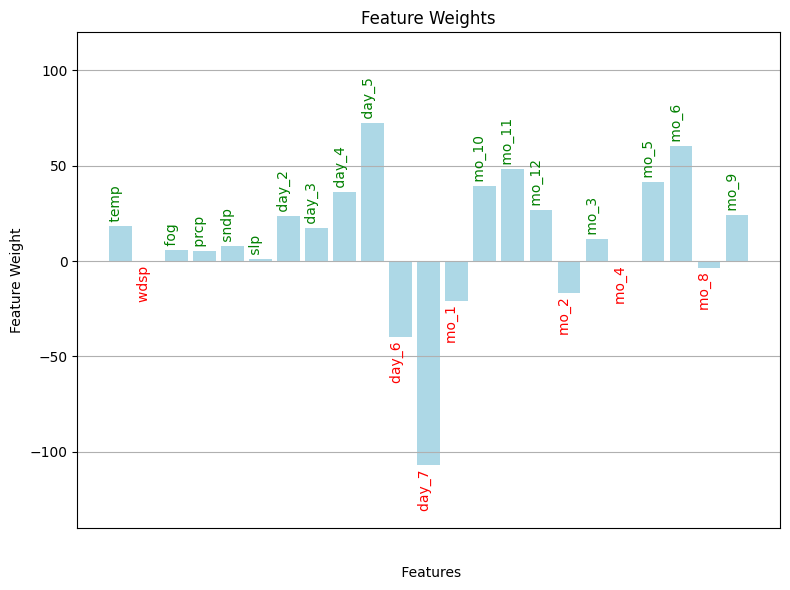

In [720]:
#zipping our features and weights together 
feature_weights = dict(zip(X_df.columns, lr.coef_ ) ) 

plt.figure(figsize=(8, 6))

plt.bar(np.arange(len(feature_weights)), feature_weights.values(), align = 'edge', color = 'lightblue') 
plt.xticks([])
# plt.xticks(np.arange(len(feature_weights)) , feature_weights.keys() , rotation = 90 ); 
for idx, (key,value) in enumerate(feature_weights.items() ):
    if value > 0: 
        plt.text(idx, value, s  = f' {key}', rotation = 90 ,ha = 'left' , va = 'bottom', c = 'green')
    else: 
         plt.text(idx, value, s  = f'{key} ', rotation = 90 ,ha = 'left' , va = 'top', c = 'red' )

plt.ylim(-140, 120 )
plt.grid() 
plt.title('Feature Weights') 
plt.xlabel('\n\n Features') 
plt.ylabel('Feature Weight')
plt.tight_layout() 

Each model weight provides information on the importance of each feature to the model which can be gauged by the magnitude of its weight, as well as the direction of correlation which is determined by the sign of the weight.

Day of week features are highly weighted by the model, in particuluar the feature `day_7` which represents Sunday has the largest weight across all features around -110. It's worth noting that these feature weights correspond to the scatter plot of `day` of week against `NUM_COLLISIONS` where Sunday achieves the lowest mean `NUM_COLLISIONS` and Friday which represents `day_5` achieves the highest mean `NUM_COLLISIONS`. 

Month of year features seem to also be highly weighted by the model January which is represented by `mo_1` has a weight ~ -40, which corresponds with the scatter plot between `mo` and `NUM_COLLISIONS`. However, `mo_6` has the highest feature weight despite september (`mo_9`) having the largest mean `NUM_COLLISIONS`, this is likely a result of Linear Regression being conditional. Linear Regression being conditional means that it measures the correlation between each feature and the target variable whilst holding every other variable constant, which is in contrast to the pearsons correlation coefficient where we directly measure the correlation between 2 features without holding any other features constant. 

Overall, weather based features do not seem to be highly weighted by the model with `temp` achieving the highest weight out of all weather based features which agrees with bivariate data analysis where `temp` achieves the highest r score with no. colisions. `fog` , `sndp` and `prcp` all seem to have low but none neglible feature weights with `wdsp` and `slp` having weights which are virtually zero. 

Its important to note that by dropping the dummy variables our feature weights for our categorical variables are now somewhat less interpretable. e.g for day of the week the weight for `day_7` represents how the model weights how it would change its prediction if the day of the week was `day_7` rather than `day_1`. 

Since `day_7` as a lower no. collisions on avearge this leads to a negative model weight. Because is dummy variable represents a relative effect compared to the dropped dummy varirable, I chose to drop `day_1` which has a mean no. collisions closest to the overall average no. collisions to ensure the model weights still represent a positive or negative shift from the average behaviour. 

## Evaluating the models performance 

computing numerous metrics in order to evaluate the models performance. 

In [748]:
mse = round(mean_squared_error(ytest, lr.predict(Xtest) ) , 2) 
r2 = round(r2_score(ytest, lr.predict(Xtest)) , 2) 
mae  = round(mean_absolute_error(ytest, lr.predict(Xtest)) , 2) 

print(f' Mean Squared Error: {mse}, Mean Absolute Error: {mae},  R Squared Score: {r2}') 

 Mean Squared Error: 6022.52, Mean Absolute Error: 60.55,  R Squared Score: 0.35


A Mean Absolute Error of ~60 means that on average our predictions are off by about 60 collisions and an R2 score of ~35% of means our model was able to capture ~35% of the total variance which exists inside of the distribution of no. collisions. 

Another Interpretation of the R2 score, is that it represents the the percentage improvement in Mean Squared Error that the model achieves when compared to simply predicting the mean. If the company is currently offering the same price to customers everyday regardless of the weather / time, then they are essentially predicting that the number of collisions each day will be the same and may be pricing their insurance relative to the mean number of collisions. Hence, the R2 score is loosely measuring how much more effective our model is compared to the current strategy/static pricing. 

Although our model was able to fit to more than just random noise there is still roughly 65% of the variance inside of the distribution of no. collisions which is left unexplained by our model. This is likely due to many factors, I've listed a couple below: 

- Our dataset is likely missing other features which are correlated with `NUM_COLLISIONS` E.g. the design of roads, special holidays etc. 

-  Linear Regression is probably too simple to learn the complex relationships which likely exist between our features and no. collisions, perhaps more complex non linear models such as neural networks would achieve lower errors.

-  Car collisions are a result of random chance and so the total number of car collisions on any given day will remain somewhat unpredictable.


The accuracy of our model must be considered in the context of the problem it is aiming to solve, which is pricing insurance. If the number of collisions is being fed into pricing, incorrect predictioncs and either lead to the price being set too high leading the company to become uncompetitive and if the price is set too low they risk losing money.

# Task 3.  

One usecase where the module learnings could be applied at work is in content based recommendation systems, which leverage metadata to learn numerical/vector represenations for items. 

Some examples of metadata which is often used inside of content based recommender system are: genre, format, rating, duration and age rating. I could apply the module learnings around feature correlation(K5/ S1) to explore the correlations between model features to ensure that my features are not highly correlated to each other. As, if two features are highly correlated with each other then they likely contain similar information making one of them redundant as our model will likely achieve the same/similar performance with only one of them. 

This module could help me make more informed decisions around feature engineering(S2) as it is has improved my understanding around correlation which can be applied feature engineering when designing content based recommender systems. 

# Bibliography 

Fowler, D. (1996). The Binomial Coefficient Function. American Mathematical Monthly, 103(1), pp.1–17. doi:https://doi.org/10.1080/00029890.1996.12004694.Hernandez, H. (2016). Modelling the effect of fluctuation in nonlinear systems using variance algebra - Application to light... ResearchGate. [online] doi:https://doi.org/10.13140/RG.2.2.36501.52969.Kolter, Z. (2015). Linear Algebra Review and Reference. [online] Available at: https://cs229.stanford.edu/section/cs229-linalg.pdf.Lops, P., de Gemmis, M. and Semeraro, G. (2010). Content-based Recommender Systems: State of the Art and Trends. Recommender Systems Handbook, [online] pp.73–105. doi:https://doi.org/10.1007/978-0-387-85820-3_3.Mohan, R. (2024). M P RA Munich Personal RePEc Archive Perfect Multicollinearity and Dummy Variable Trap: Explaining the Unexplained. [online] Available at: https://mpra.ub.uni-muenchen.de/120376/1/MPRA_paper_120376.pdf.Rodriguez, M. (2022). Chapter 29 Standard Errors and Variance Estimates | Matrix Algebra for Educational Scientists. [online] Github.io. Available at: https://zief0002.github.io/matrix-algebra/standard-errors-and-variance-estimates.html [Accessed 31 May 2025].Yan, L. and Cain, J. (2020). Central Limit Theorem. [online] Available at: https://web.stanford.edu/class/archive/cs/cs109/cs109.1212/lectureNotes/LN18_clt.pdf [Accessed 16 Dec. 2024].Zhu, X. (2011). Advanced Artificial Intelligence. [online] Available at: https://pages.cs.wisc.edu/~jerryzhu/cs731/regression.pdf.